<a href="https://colab.research.google.com/github/Samantbajracharya/EDA-/blob/main/24BCE2924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"  # Prevent debugger validation warnings

import pandas as pd

# Load only required columns from the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
use_columns = ['gender', 'age', 'height_cm', 'weight_kg', 'class']
df = pd.read_csv(url, usecols=use_columns)

# Create a multi-index using gender and age
df.set_index(['gender', 'age'], inplace=True)
print("With Multi-Index:\n", df.head())

# Reset back to default index
df.reset_index(inplace=True)
print("\nAfter Resetting Index:\n", df.head())


With Multi-Index:
             height_cm  weight_kg class
gender age                            
M      27       172.3      75.24     C
       25       165.0      55.80     A
       31       179.6      78.00     C
       32       174.5      71.10     B
       28       173.8      67.70     B

After Resetting Index:
   gender  age  height_cm  weight_kg class
0      M   27      172.3      75.24     C
1      M   25      165.0      55.80     A
2      M   31      179.6      78.00     C
3      M   32      174.5      71.10     B
4      M   28      173.8      67.70     B


In [ ]:
import pandas as pd
from google.colab import files

# GitHub raw CSV link
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"

# Read CSV into DataFrame
df = pd.read_csv(url)

# Save to Excel file
excel_filename = "bodyPerformance.xlsx"
df.to_excel(excel_filename, index=False)

# Download the file
files.download(excel_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "bodyPerformance.xlsx"
df = pd.read_excel(file_path)

# View the column names
print(df.columns)

# View the first few rows of the dataset
df.head()


Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')


age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4       76.0     147.0   
4   28      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [ ]:
# Check dataset dimensions
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Basic information of the dataset
df.info()

# Statistical summary of numerical features
df.describe()

The dataset contains 13393 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   gender                   13392 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13392 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.2+ MB


age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13392.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240258     78.796842   
std       13.625639      8.426583     11.949666      7.257107     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13392.000000  13393.000000             13393.000000    13393.000000   
mean     130.233938     36.963877                15.209268       39.771224   
std       14.714152     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

In [ ]:
# Checking for missing values
print("Missing values before filling:")
print(df.isnull().sum())

# Separating numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for non-numeric columns with the mode
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again after filling
print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values before filling:
age                        0
gender                     1
height_cm                  0
weight_kg                  0
body fat_%                 1
diastolic                  0
systolic                   1
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Missing values after filling:
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


/tmp/ipython-input-368428433.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df = df.assign(
    gender=df['gender'].fillna(df['gender'].mode()[0]),
    **{'class': df['class'].fillna(df['class'].mode()[0])}
)


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Number of duplicate rows: 1
Shape after removing duplicates: (13392, 12)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to detect outliers in selected numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'weight_kg']], palette='coolwarm')
plt.title('Boxplot for Outlier Detection (Reg no:24BCE2924)', fontsize=16, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Filter out outliers based on 'weight_kg' (adjust threshold if needed)
threshold = df['weight_kg'].quantile(0.95)
df_filtered = df[df['weight_kg'] < threshold]

print(f"Shape after filtering out outliers: {df_filtered.shape}")


Shape after filtering out outliers: (12714, 12)


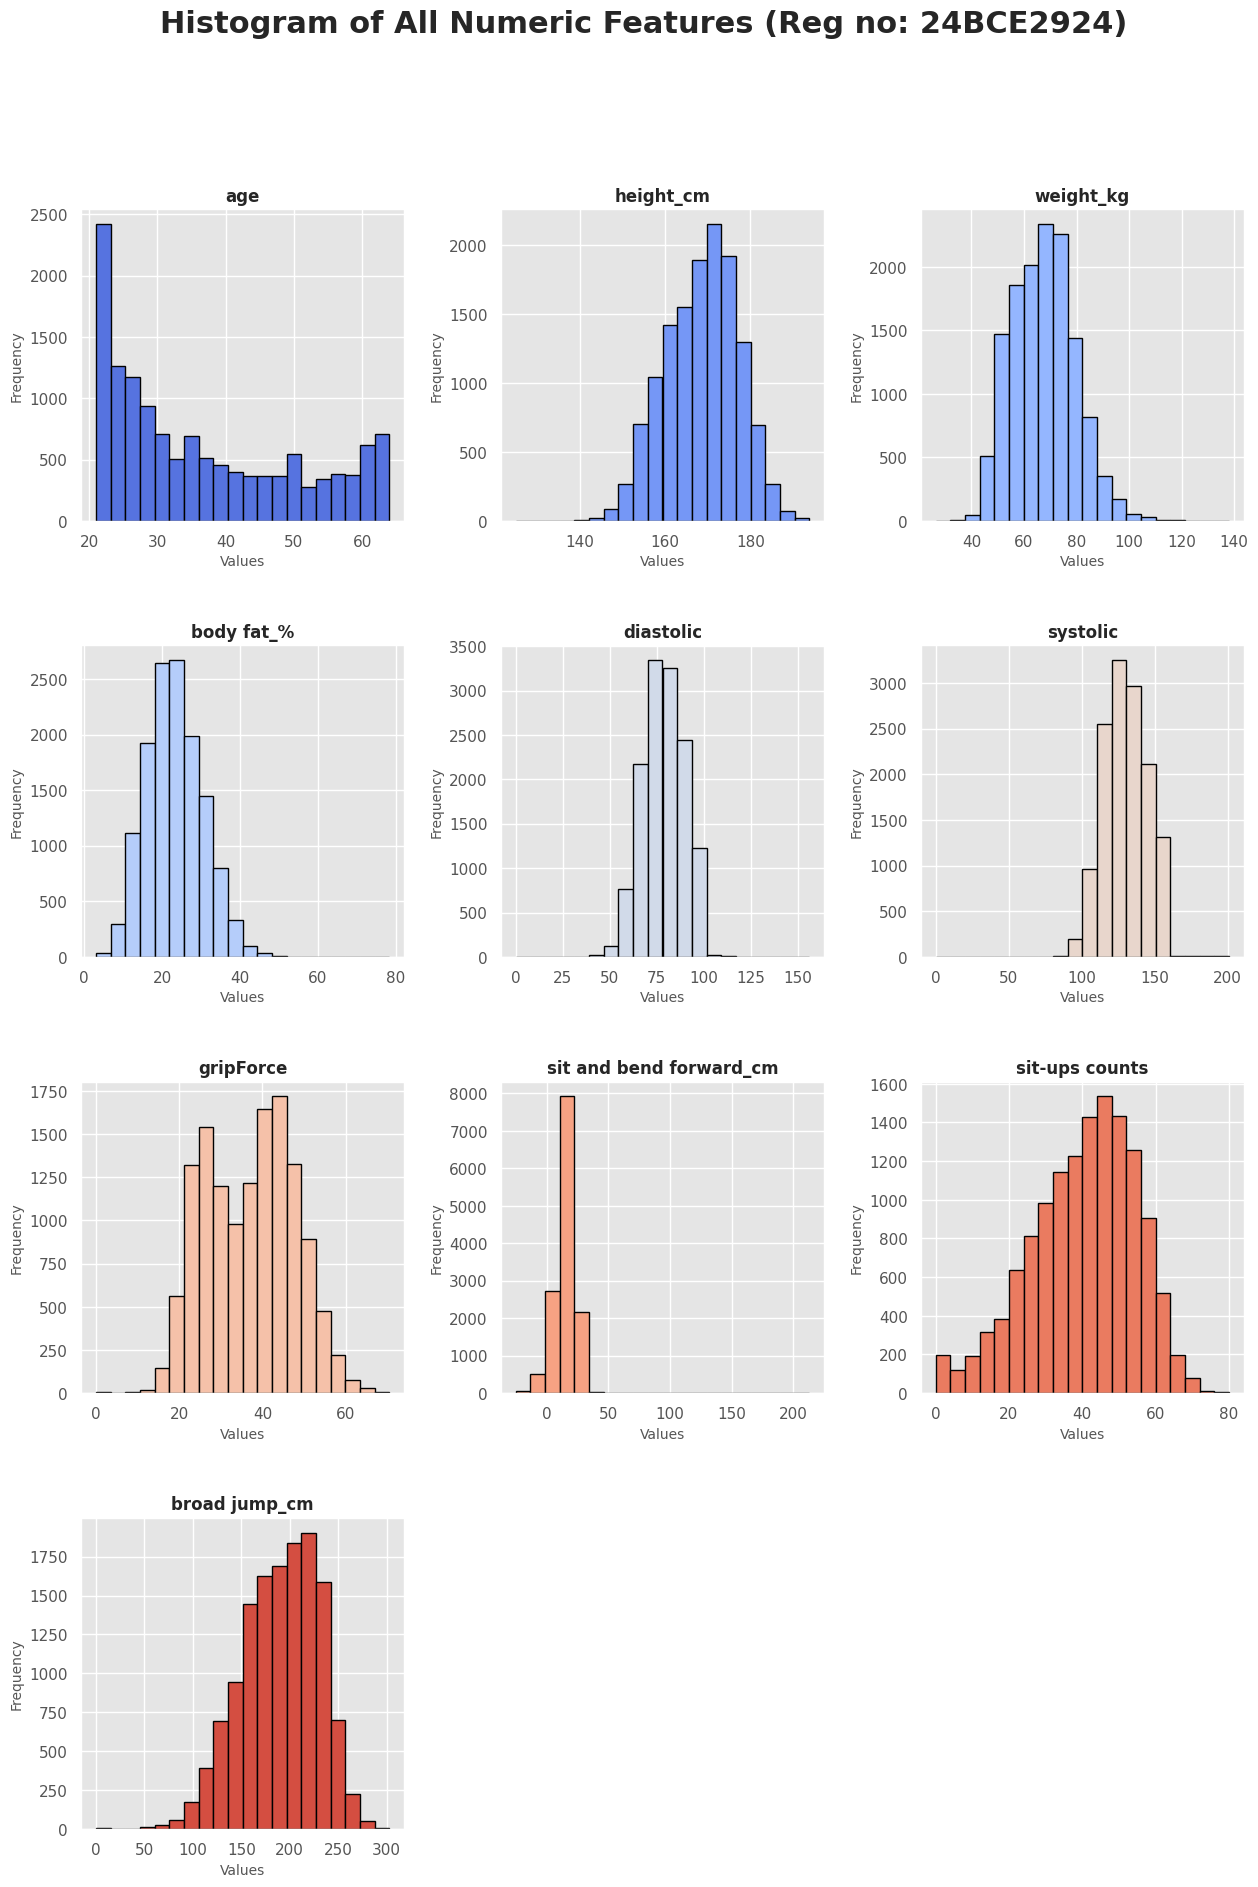

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Determine subplot grid size
num_features = len(df_numeric.columns)
num_cols = 3
num_rows = -(-num_features // num_cols)  # Ceiling division

# Generate a color palette with distinct colors
colors = sns.color_palette("coolwarm", num_features)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(df_numeric.columns):
    df_numeric[column].plot(
        kind='hist', ax=axes[i], bins=20,
        color=colors[i], edgecolor='black', linewidth=1.0
    )
    axes[i].set_title(column, fontsize=12, weight='bold')
    axes[i].set_xlabel('Values', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Update title with your reg no
plt.suptitle('Histogram of All Numeric Features (Reg no: 24BCE2924)', fontsize=22, weight='bold', y=1.02)
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

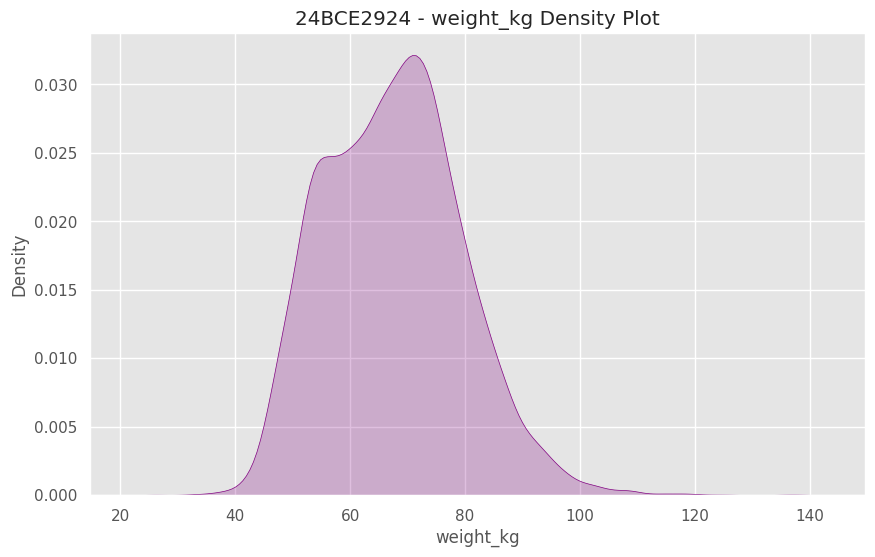

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['weight_kg'], color='purple', fill=True)
plt.title("24BCE2924 - weight_kg Density Plot")
plt.xlabel("weight_kg")
plt.ylabel("Density")
plt.show()


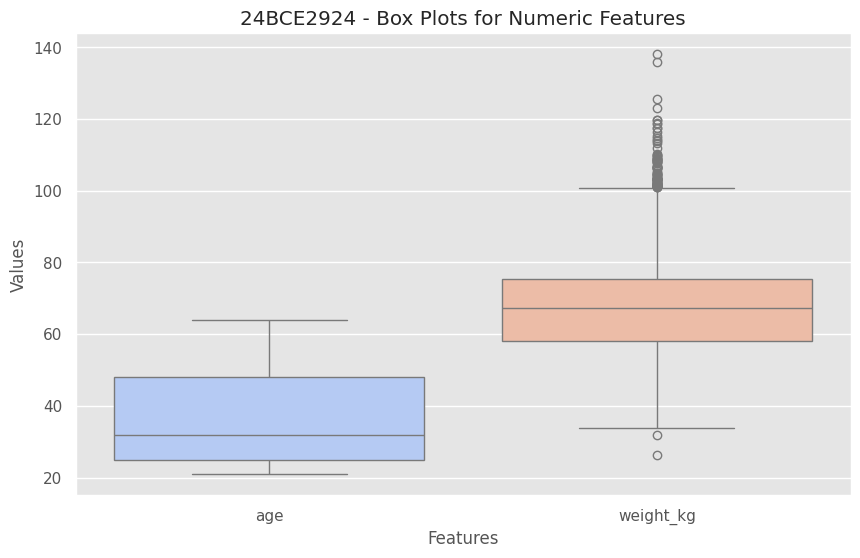

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'weight_kg']], palette='coolwarm')
plt.title("24BCE2924 - Box Plots for Numeric Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


/tmp/ipython-input-1225624477.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))


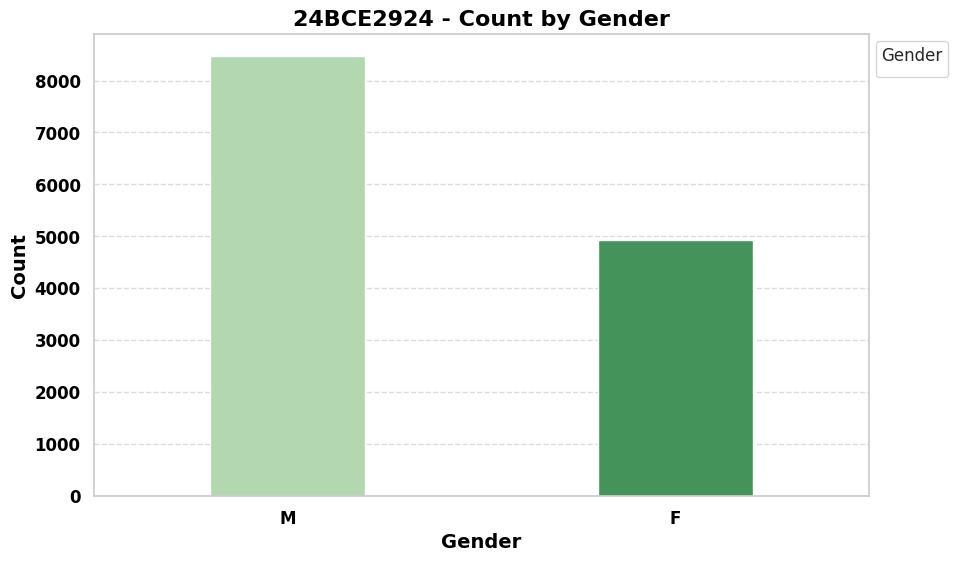

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Create the figure and size
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Greens", n_colors=2)

# Create the count plot based on 'gender'
sns.countplot(x='gender', hue='gender', data=df, palette=colors, width=0.4)

# Set the title with bold font
plt.title("24BCE2924 - Count by Gender", fontsize=16, fontweight='bold', color='black')

# Customize the x and y axis labels
plt.xlabel("Gender", fontsize=14, color='black', fontweight='bold')
plt.ylabel("Count", fontsize=14, color='black', fontweight='bold')

# Customize tick parameters for a clean look
plt.xticks(fontsize=12, color='black', fontweight='bold')
plt.yticks(fontsize=12, color='black', fontweight='bold')

# Add gridlines for better readability with dashed style
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend outside the plot area
plt.legend(title='Gender', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


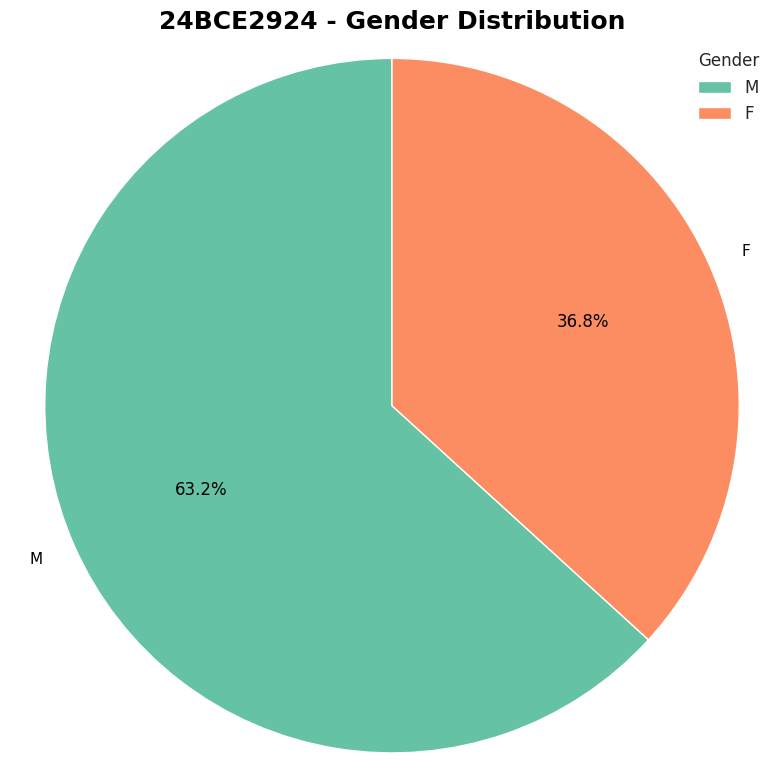

In [ ]:
import matplotlib.pyplot as plt

# Get gender counts
gender_counts = df['gender'].value_counts()

# Create the figure with a balanced size
plt.figure(figsize=(8, 8))

# Custom color palette
colors = ['#66c2a5', '#fc8d62']

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=False,
    radius=0.8
)

# Set the title
plt.title("24BCE2924 - Gender Distribution", fontsize=18, fontweight='bold', color='black')
plt.axis('equal')  # Ensures the pie chart is circular

# Customize text colors
for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')

# Create a legend
plt.legend(wedges, gender_counts.index, title="Gender", loc="upper right", fontsize=12, frameon=False)

# Improve layout
plt.tight_layout()

# Show the pie chart
plt.show()


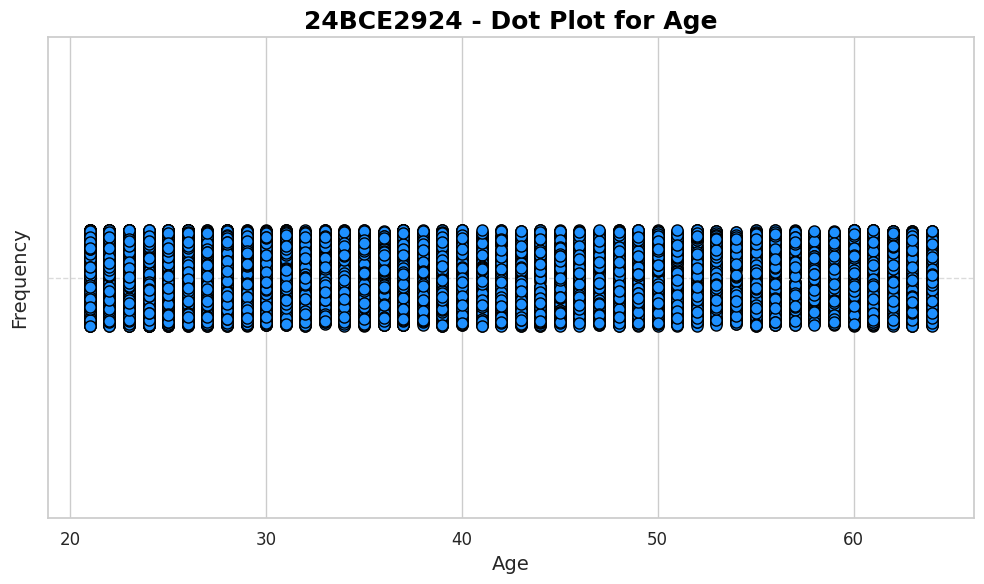

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Dot plot for 'age' with updated colors
sns.stripplot(x='age', data=df, color='#1E90FF', size=8, jitter=True, edgecolor='black', linewidth=1)

plt.title("24BCE2924 - Dot Plot for Age", fontsize=18, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize ticks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Define a color palette with diverse colors for clarity
palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)

# Enhance plot aesthetics
plt.title('Boxplot for All Features (Reg. No.: 24BCE2924)', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Encode categorical columns for bodyPerformance dataset
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Map class categories to numbers
class_mapping = {label: idx for idx, label in enumerate(sorted(df['class'].unique()))}
df['class'] = df['class'].map(class_mapping)

print("24BCE2924 - Gender and Class columns encoded successfully.")
print("Class mapping used:", class_mapping)


24BCE2924 - Gender and Class columns encoded successfully.
Class mapping used: {'?': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4}


In [ ]:
import pandas as pd

# Define bins and labels for Age
bins = [0, 20, 40, 60, 80]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new categorical column based on "age" values
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Display first few rows to check
print("24BCE2924 - Age category mapping")
print(df[['age', 'age_category']].head())

# Create a contingency table comparing 'gender' with age categories
contingency_table = pd.crosstab(df['gender'], df['age_category'])
print("\nContingency Table (Gender vs Age Category):")
print(contingency_table)


24BCE2924 - Age category mapping
   age age_category
0   27        Adult
1   25        Adult
2   31        Adult
3   32        Adult
4   28        Adult

Contingency Table (Gender vs Age Category):
age_category  Adult  Middle-aged  Senior
gender                                  
0              2929         1585     411
1              5734         2180     553


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Binning Age into categories
bins = [0, 20, 40, 60, 80]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Contingency table for gender vs age category
contingency_table = pd.crosstab(df['gender'], df['age_category'])

plt.figure(figsize=(10, 6))

colors = sns.color_palette("coolwarm", n_colors=len(contingency_table.columns))

contingency_table.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    width=0.5
)

# Title & labels
plt.title("24BCE2924 - Stacked Bar Chart of Gender vs Age Categories", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Customize ticks
plt.xticks(rotation=0, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Age Category', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, shadow=False)

# Adjust layout
plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

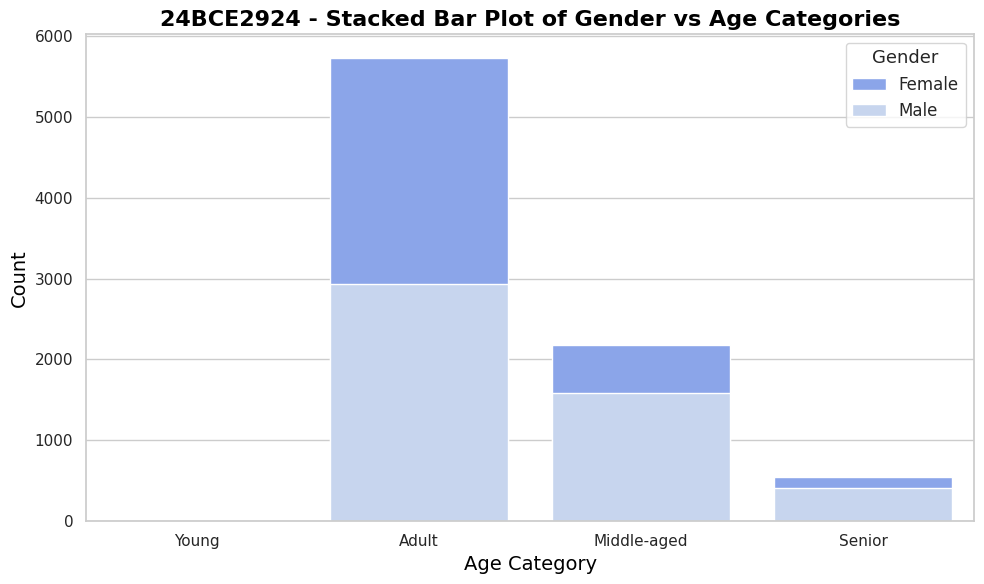

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv")

sns.set(style="whitegrid")

# Define bins and labels for age
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new categorical column based on age
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Set palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=4))

# Stacked Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='gender', data=df, dodge=False)

# Title & labels
plt.title("24BCE2924 - Stacked Bar Plot of Gender vs Age Categories", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Legend customization
plt.legend(title='Gender', labels=['Female', 'Male'], fontsize=12, title_fontsize=13, loc='upper right')

plt.tight_layout()
plt.show()


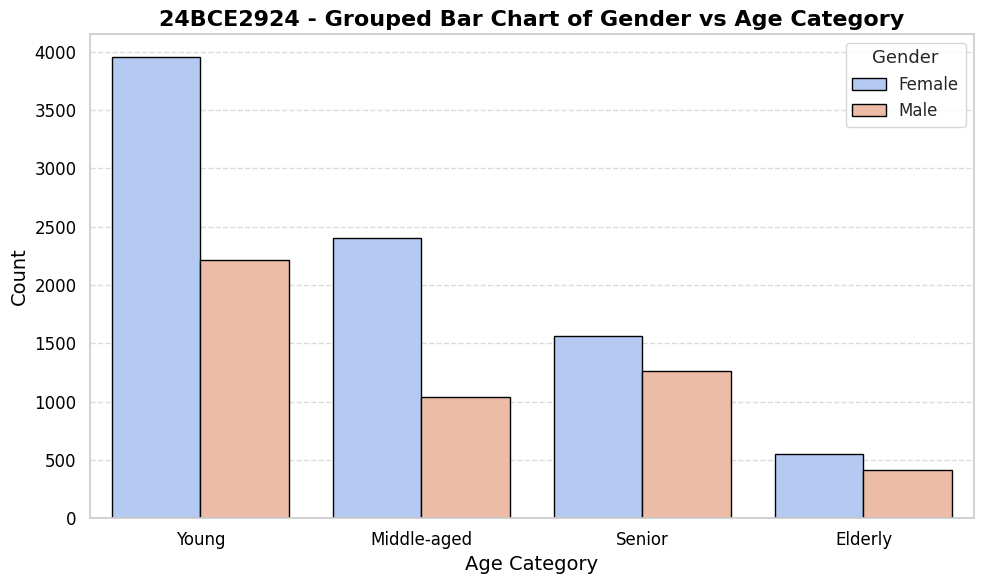

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the bodyPerformance dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

sns.set(style="whitegrid")

# Define bins and labels for age
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']

# Create a new categorical column based on "age"
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Define a more diverse color palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=2))

# Create a grouped bar chart (Age category vs Gender)
sns.countplot(data=df, x='age_category', hue='gender', edgecolor='black')

# Set the title and labels
plt.title("24BCE2924 - Grouped Bar Chart of Gender vs Age Category", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a legend
plt.legend(title='Gender', labels=['Female', 'Male'], title_fontsize=13, fontsize=12, loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show the grouped bar chart
plt.show()


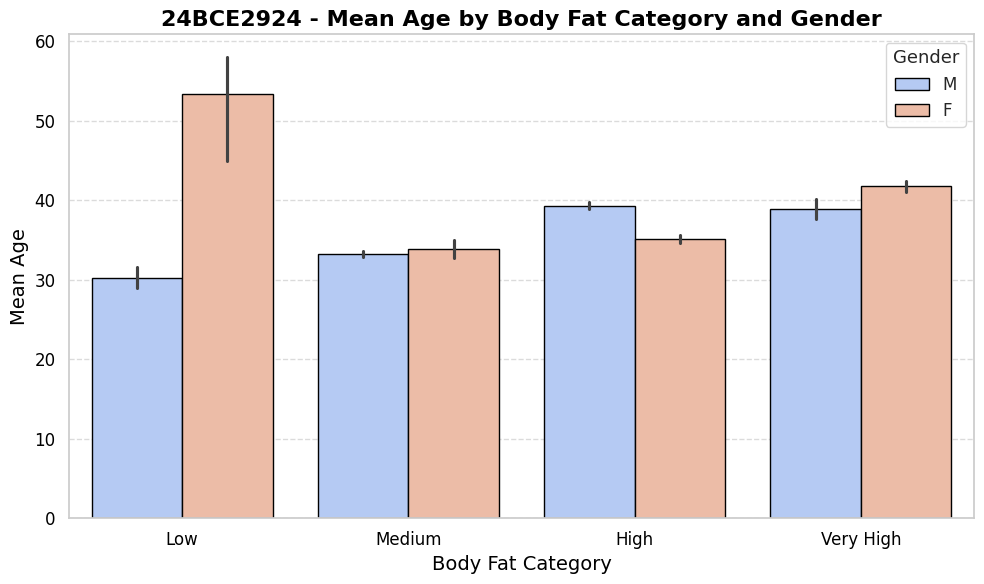

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset from uploaded file
file_path = "bodyPerformance.xlsx"  # Change path if needed
df = pd.read_excel(file_path)

sns.set(style="whitegrid")

# Define bins for body fat percentage
bins = [0, 10, 20, 30, 40]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new categorical column based on body fat percentage
df['Body_Fat_Category'] = pd.cut(df['body fat_%'], bins=bins, labels=labels, include_lowest=True)

# Create a figure
plt.figure(figsize=(10, 6))

# Set color palette
sns.set_palette(sns.color_palette("coolwarm", n_colors=2))

# Create a bar plot (Mean Age by Body Fat category and gender)
sns.barplot(data=df, x='Body_Fat_Category', y='age', hue='gender', edgecolor='black')

# Title and labels
plt.title("24BCE2924 - Mean Age by Body Fat Category and Gender", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Body Fat Category", fontsize=14, color='black')
plt.ylabel("Mean Age", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Gender', title_fontsize=13, fontsize=12, loc='upper right', frameon=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


/tmp/ipython-input-3343950985.py:24: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  kde_plot = sns.kdeplot(


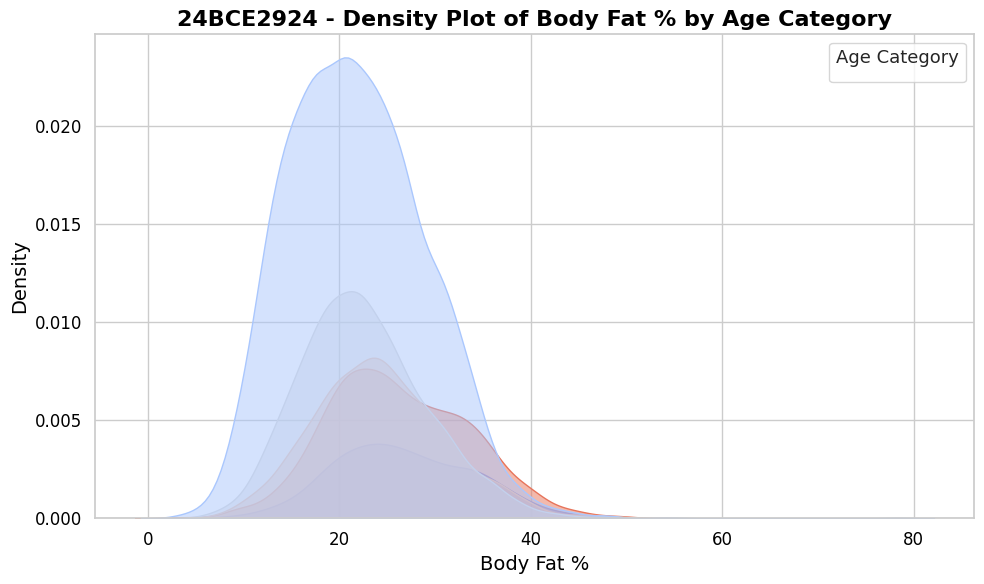

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset from uploaded file
file_path = "bodyPerformance.xlsx"
df = pd.read_excel(file_path)

sns.set(style="whitegrid")

# Define bins and labels for Age
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

# Create a new categorical column based on "age"
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Remove NaN categories for palette size
unique_categories = df['age_category'].dropna().unique()
palette = sns.color_palette("coolwarm", n_colors=len(unique_categories))

# KDE plot with filled areas (Body Fat % vs Age category)
plt.figure(figsize=(10, 6))
kde_plot = sns.kdeplot(
    data=df,
    x='body fat_%',
    hue='age_category',
    fill=True,
    palette=palette,
    alpha=0.5,
    warn_singular=False
)

# Title and labels
plt.title("24BCE2924 - Density Plot of Body Fat % by Age Category",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Body Fat %", fontsize=14, color='black')
plt.ylabel("Density", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Legend
handles, labels_list = kde_plot.get_legend_handles_labels()
plt.legend(handles, labels_list, title='Age Category', title_fontsize=13,
           fontsize=12, loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2178873703.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_category', y='body fat_%', palette=palette)


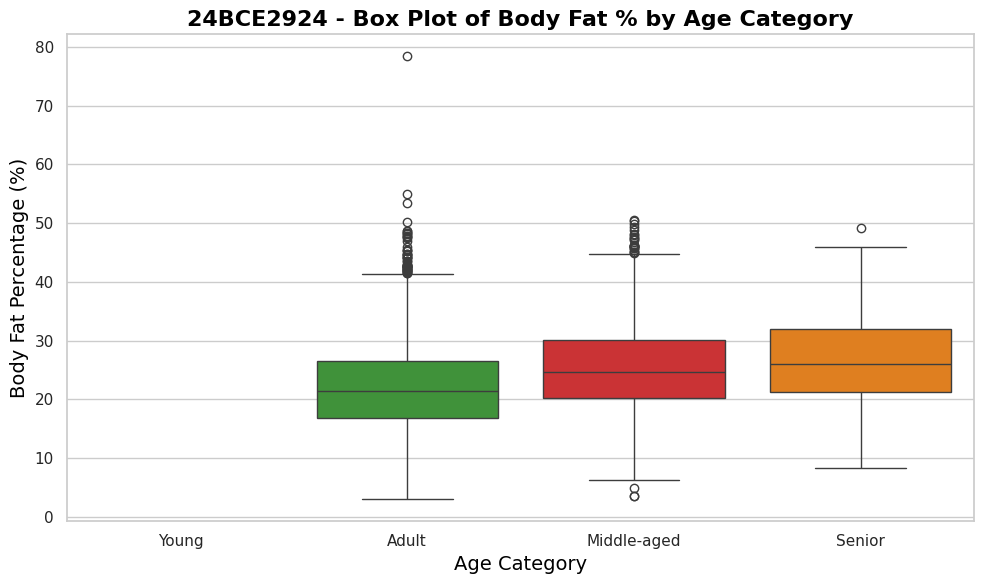

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
file_path = 'bodyPerformance.xlsx'  # Change to your file location if needed
df = pd.read_excel(file_path)

# Set style
sns.set(style="whitegrid")

# Categorize Age into bins
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Plot: Boxplot of body fat % by Age Category
plt.figure(figsize=(10, 6))
palette = ["#1F78B4", "#33A02C", "#E31A1C", "#FF7F00"]

sns.boxplot(data=df, x='age_category', y='body fat_%', palette=palette)

# Title and labels
plt.title("24BCE2924 - Box Plot of Body Fat % by Age Category",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age Category", fontsize=14, color='black')
plt.ylabel("Body Fat Percentage (%)", fontsize=14, color='black')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1996233043.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='gender', y='body fat_%', palette=palette, linewidth=1, inner="box")
/tmp/ipython-input-1996233043.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(data=df, x='gender', y='body fat_%', palette=palette, linewidth=1, inner="box")


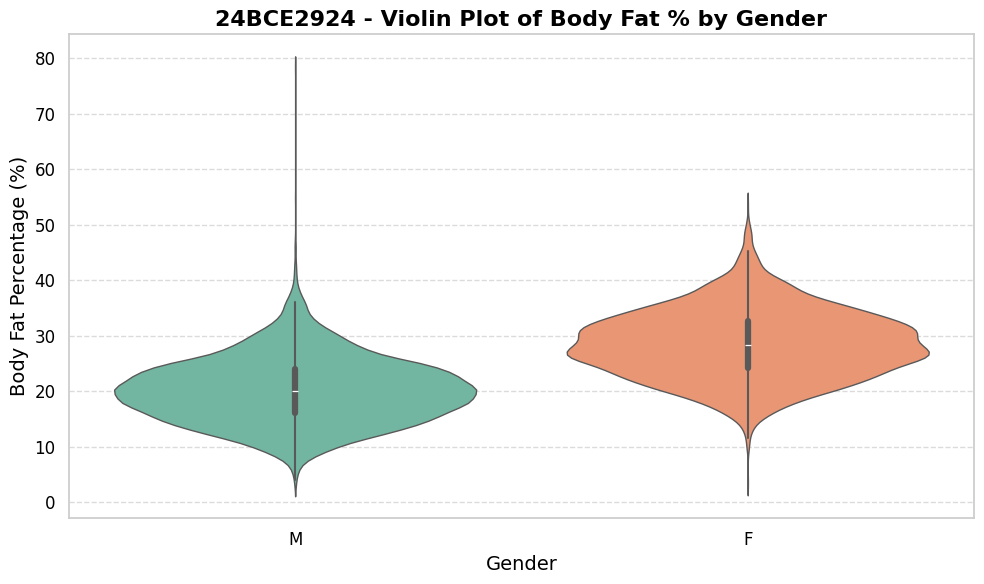

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

palette = sns.color_palette("Set2")

# Violin plot of Body Fat % by Gender
sns.violinplot(data=df, x='gender', y='body fat_%', palette=palette, linewidth=1, inner="box")

# Titles and labels
plt.title("24BCE2924 - Violin Plot of Body Fat % by Gender",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Gender", fontsize=14, color='black')
plt.ylabel("Body Fat Percentage (%)", fontsize=14, color='black')

# Customize ticks
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv")

plt.figure(figsize=(10, 6))

# Use custom color palette for each gender
palette = sns.color_palette("Set2", len(df['gender'].unique()))

# Violin plot
sns.violinplot(data=df, x='gender', y='body fat_%', palette=palette, inner=None)

# Box plot on top of violin plot
sns.boxplot(data=df, x='gender', y='body fat_%', color='white', fliersize=0)

# Title and labels
plt.title("24BCE2924 - Combined Violin and Box Plot of Body Fat % by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Body Fat Percentage (%)", fontsize=14)

# Tick adjustments
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/tmp/ipython-input-3906657432.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='gender', y='body fat_%', palette=palette, inner=None)
/tmp/ipython-input-3906657432.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df, x='gender', y='body fat_%', palette=palette, inner=None)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv")

# Calculate mean Body Fat % for each gender
mean_values = df.groupby('gender')['body fat_%'].mean().reset_index()

plt.figure(figsize=(10, 6))

line_color = "#FF5733"

# Create the line plot
sns.lineplot(data=mean_values, x='gender', y='body fat_%', marker='o', color=line_color, linewidth=2)

# Title and labels
plt.title("24BCE2924 - Line Plot of Mean Body Fat % by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Mean Body Fat Percentage (%)", fontsize=14)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv")

# Define custom color map
colors = ["#d0e1f9", "#91bad6", "#7b68ee", "#5a2a82"]
cmap = LinearSegmentedColormap.from_list("blue_purple", colors, N=256)

# Select numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    fmt='.2f',
    linewidths=0.5,
    vmin=-1, vmax=1,
    center=0,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10, "weight": 'bold'}
)

# Customize plot
plt.title('Correlation Heatmap of Numeric Features (Reg. No.: 24BCE2924)',
          fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


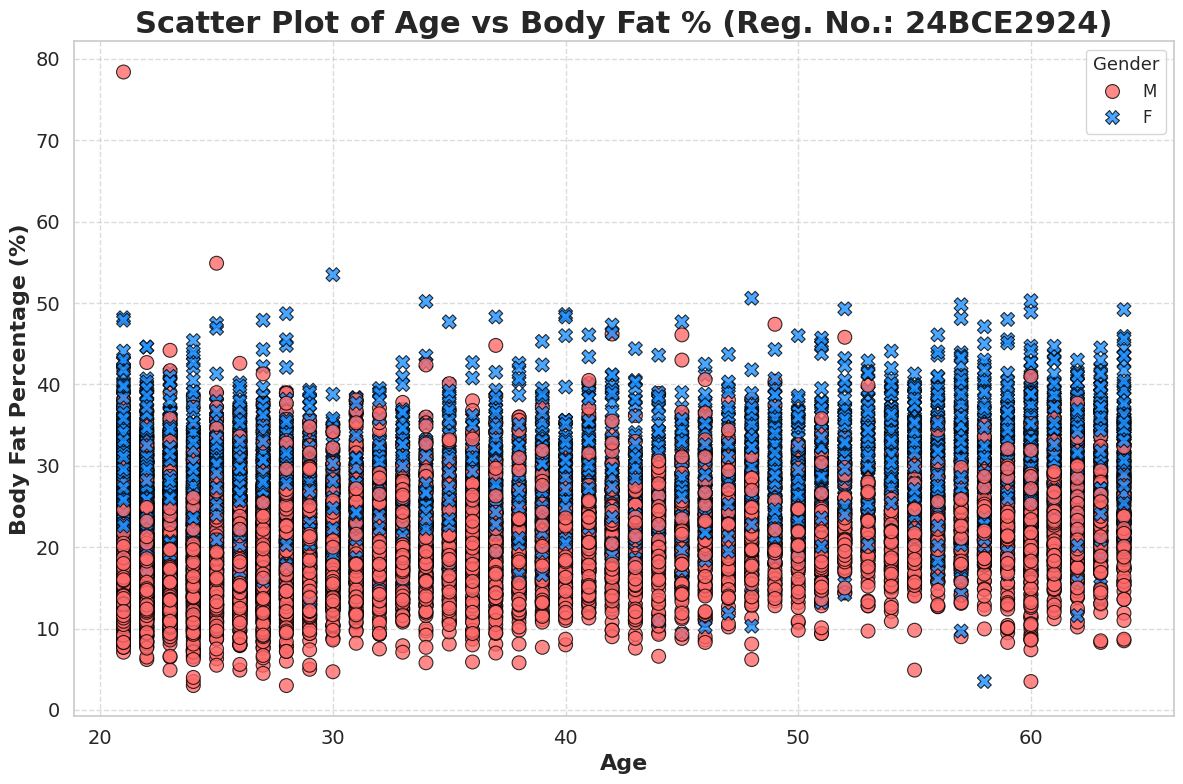

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv")

palette = sns.color_palette(["#FF6B6B", "#1E90FF"])  # Two colors for Gender

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='age',             # X-axis: Age
    y='body fat_%',      # Y-axis: Body Fat %
    hue='gender',        # Color by Gender (M or F)
    data=df,
    palette=palette,
    style='gender',      # Marker style by Gender
    s=100,
    edgecolor='black',
    alpha=0.8
)

# Customize the plot
plt.title('Scatter Plot of Age vs Body Fat % (Reg. No.: 24BCE2924)',
          fontsize=22, weight='bold')
plt.xlabel('Age', fontsize=16, weight='bold')
plt.ylabel('Body Fat Percentage (%)', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend with a clear title
plt.legend(title='Gender', title_fontsize='13', fontsize='12', loc='best')

# Show the plot
plt.tight_layout()
plt.show()


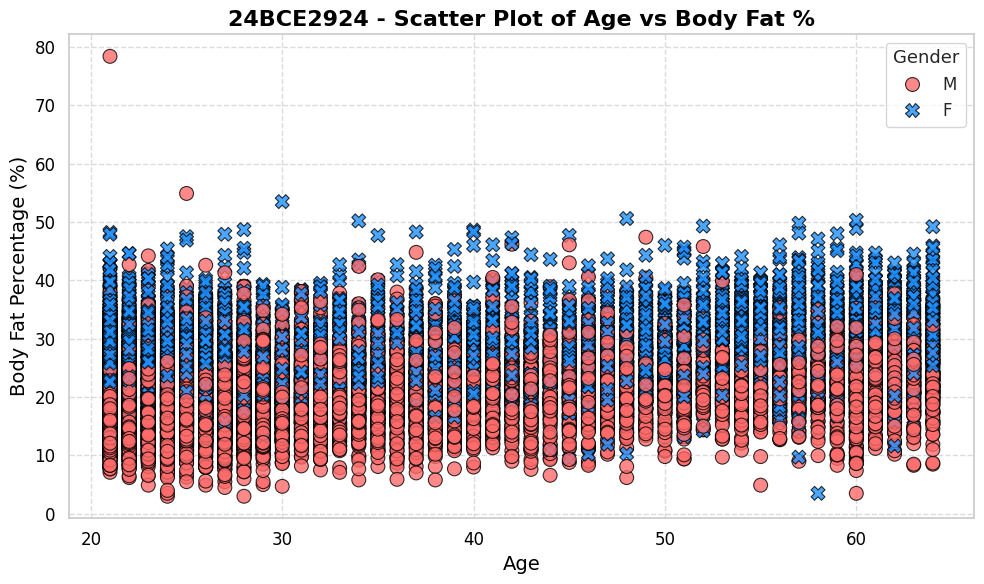

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Color palette for gender
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='age',             # X-axis: Age
    y='body fat_%',      # Y-axis: Body Fat %
    hue='gender',        # Color by Gender
    palette=palette,
    style='gender',      # Marker style by Gender
    s=100,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("24BCE2924 - Scatter Plot of Age vs Body Fat %", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Body Fat Percentage (%)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(title='Gender', title_fontsize='13', fontsize='12', loc='best')

plt.tight_layout()
plt.show()


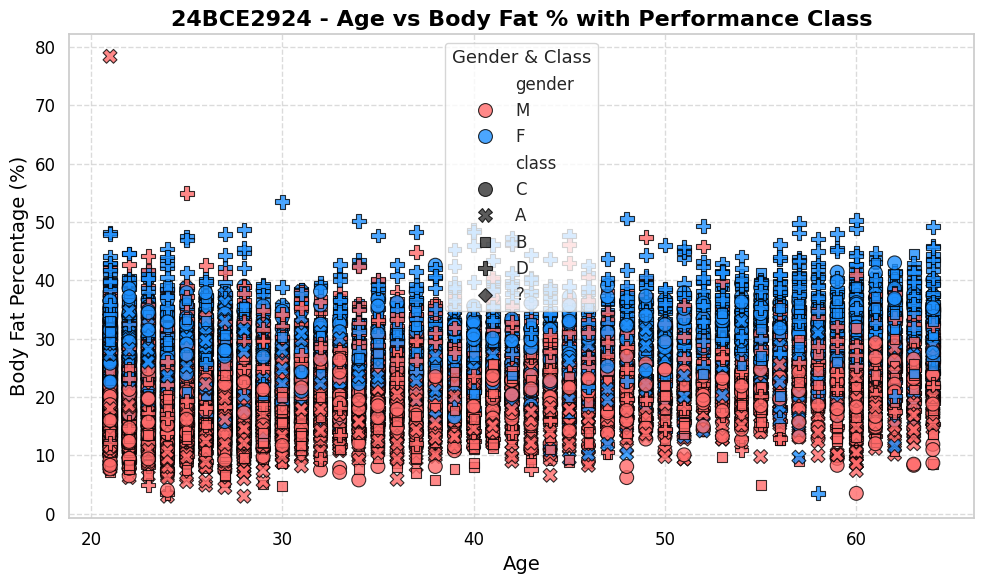

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Custom color palette for Male & Female
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='age',
    y='body fat_%',
    hue='gender',       # Color by gender
    style='class',      # Marker style by performance class
    palette=palette,
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.title(
    "24BCE2924 - Age vs Body Fat % with Performance Class",
    fontsize=16,
    fontweight='bold',
    color='black'
)
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Body Fat Percentage (%)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(title='Gender & Class', title_fontsize=13, fontsize=12, loc='best')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Define color palette for Gender
palette = sns.color_palette(["#FF6B6B", "#1E90FF"])

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='age',
    y='body fat_%',
    hue='gender',
    size='body fat_%',
    sizes=(20, 200),
    palette=palette,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("24BCE2924 - Scatter Plot of Age vs Body Fat % with Gender & Size",
          fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Body Fat Percentage (%)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust legends
h, l = scatter.get_legend_handles_labels()
plt.legend(h, l, title="Gender & Body Fat %", title_fontsize=13, fontsize=12, loc='best')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Map 'class' to numeric bubble sizes (example mapping)
class_size_map = {'A': 300, 'B': 200, 'C': 150, 'D': 100}
df['Class_size'] = df['class'].map(class_size_map)

# Custom color palette for gender
palette = sns.color_palette(["#FFA500", "#4682B4"])

# Create bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='age',
    y='body fat_%',
    hue='gender',
    size='Class_size',
    sizes=(20, 300),
    palette=palette,
    edgecolor='black',
    alpha=0.8
)

# Title and labels
plt.title("24BCE2924 - Bubble Plot of Age vs Body Fat %", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Age", fontsize=14, color='black')
plt.ylabel("Body Fat Percentage (%)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


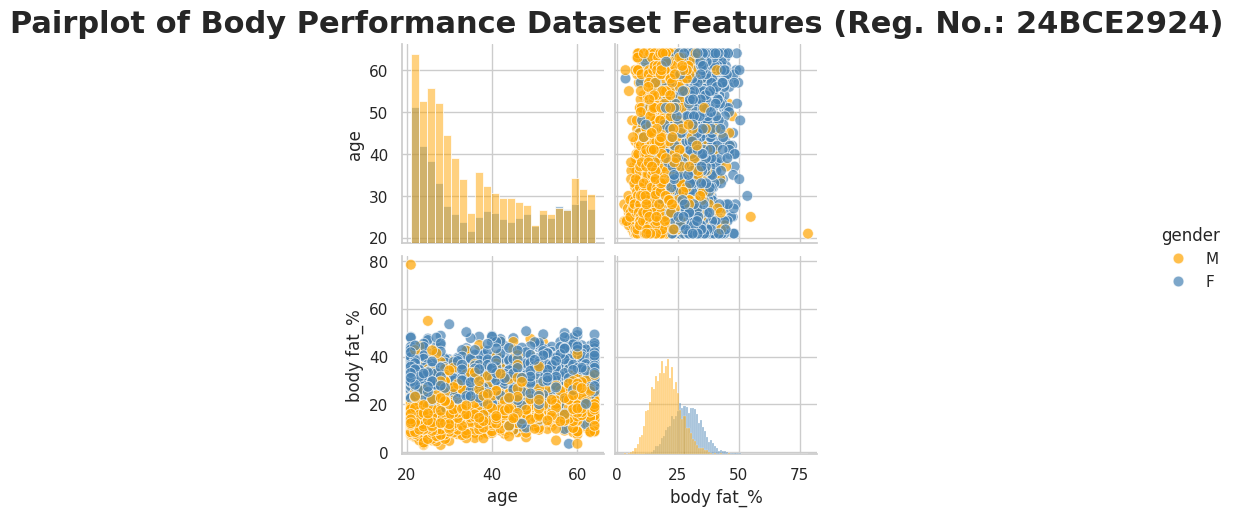

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Custom color palette for Male and Female
palette = sns.color_palette(["#FFA500", "#4682B4"])

# Features to include in the pairplot
features_of_interest = ['age', 'body fat_%']  # numeric features
df_relevant = df[features_of_interest + ['gender']]

# Create pairplot
pairplot = sns.pairplot(
    df_relevant,
    hue='gender',
    palette=palette,
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 'edgecolor': 'w', 's': 60},
)

# Add title
pairplot.fig.suptitle('Pairplot of Body Performance Dataset Features (Reg. No.: 24BCE2924)',
                      fontsize=22, weight='bold', y=1.02)
pairplot.fig.subplots_adjust(top=0.95)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Colors for Male/Female
colors = ["#FFA500", "#4682B4"]

# FacetGrid histogram by gender
g = sns.FacetGrid(df, col='gender', height=5, aspect=1, palette=colors)
g.map(sns.histplot, 'body fat_%', bins=20, alpha=0.7, color="#4682B4")

# Add legend and title
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("24BCE2924 - Histogram of Body Fat % by Gender", fontsize=16, fontweight='bold')

plt.show()


In [ ]:
import pandas as pd

df1SE = pd.DataFrame({'StudentID': [2, 3, 4], 'ScoreSE': [23, 15, 41]})
df2SE = pd.DataFrame({'StudentID': [6, 7, 10], 'ScoreSE': [27, 50, 31]})

df1ML = pd.DataFrame({'StudentID': [1, 4, 5], 'ScoreML': [39, 41, 19]})
df2ML = pd.DataFrame({'StudentID': [6, 7, 8, 9], 'ScoreML': [20, 43, 31, 34]})

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df2 = pd.merge(dfML, dfSE, on="StudentID", how="outer")

print(df2)

   StudentID  ScoreML  ScoreSE
0          1     39.0      NaN
1          2      NaN     23.0
2          3      NaN     15.0
3          4     41.0     41.0
4          5     19.0      NaN
5          6     20.0     27.0
6          7     43.0     50.0
7          8     31.0      NaN
8          9     34.0      NaN
9         10      NaN     31.0


In [ ]:
import pandas as pd

# Load bodyPerformance dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv'
df = pd.read_csv(url)

# Print column names
print("Columns:", df.columns.tolist())

# Create age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 35, 50, 100],
    labels=['0-18', '19-35', '36-50', '51+']
)

# Print first few rows to verify
print("\n24BCE2924 - Age Group Classification:")
print(df[['age', 'age_group']].head())


Columns: ['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'class']

24BCE2924 - Age Group Classification:
   age age_group
0   27     19-35
1   25     19-35
2   31     19-35
3   32     19-35
4   28     19-35


In [ ]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Create age_group column
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 19, 29, 39, 49, 59, 100],
    labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+']
)

# Set MultiIndex with age_group and gender
df.set_index(['age_group', 'gender'], inplace=True)

# Select subset for age_group = '20-29' and gender = 'F'
subset = df.loc[('20-29', 'F')].reset_index()

print(f"Filtered Subset for 20-29 Females - Roll No: 24BCE2924")
print(subset)


Filtered Subset for 20-29 Females - Roll No: 24BCE2924
     age_group gender  age  height_cm  weight_kg  body fat_%  diastolic  \
0        20-29      F   27      156.0      53.90        35.5       69.0   
1        20-29      F   25      164.2      66.60        30.2       82.0   
2        20-29      F   21      162.7      47.20        18.9       78.0   
3        20-29      F   25      161.7      63.36        31.3       89.0   
4        20-29      F   23      164.1      59.40        29.6       91.0   
...        ...    ...  ...        ...        ...         ...        ...   
2129     20-29      F   22      164.7      63.70        23.5       80.0   
2130     20-29      F   25      165.8      54.00        27.3       66.0   
2131     20-29      F   24      162.4      57.90        32.9       73.0   
2132     20-29      F   28      157.3      67.44        27.8       61.0   
2133     20-29      F   21      163.9      60.10        31.1       81.0   

      systolic  gripForce  sit and bend forw

/tmp/ipython-input-4007602741.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  subset = df.loc[('20-29', 'F')].reset_index()


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"


# Load drug dataset
df = pd.read_csv(url, nrows=1000)

# Create a smaller dataframe with Sex and Drug
df_merge = df[['gender', 'class']]

# Merge back with original dataset on Sex
df_merged = pd.merge(df, df_merge, on='gender')

print(df_merged.head())


   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3         80     130.0   
1   27      M      172.3      75.24        21.3         80     130.0   
2   27      M      172.3      75.24        21.3         80     130.0   
3   27      M      172.3      75.24        21.3         80     130.0   
4   27      M      172.3      75.24        21.3         80     130.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class_x  \
0       54.9                     18.4              60            217       C   
1       54.9                     18.4              60            217       C   
2       54.9                     18.4              60            217       C   
3       54.9                     18.4              60            217       C   
4       54.9                     18.4              60            217       C   

  class_y  
0       C  
1       A  
2       C  
3       B  
4       B  


In [ ]:
import pandas as pd

# Set multi-index with gender and age
df.set_index(['gender', 'age'], inplace=True)
print("With Multi-Index:\n", df.head())

# Reset index back to default
df.reset_index(inplace=True)
print("\nAfter Resetting Index:\n", df.head())


With Multi-Index:
             height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
gender age                                                                     
M      27       172.3      75.24        21.3         80     130.0       54.9   
       25       165.0      55.80        15.7         77     126.0       36.4   
       31       179.6      78.00        20.1         92     152.0       44.8   
       32       174.5      71.10        18.4         76     147.0       41.4   
       28       173.8      67.70        17.1         70     127.0       43.5   

            sit and bend forward_cm  sit-ups counts  broad jump_cm class  
gender age                                                                
M      27                      18.4              60            217     C  
       25                      16.3              53            229     A  
       31                      12.0              49            181     C  
       32                      15.2          

In [ ]:
import numpy as np

# Apply log transformation to age
df['log_age'] = np.log(df['age'] + 1)

# Show first 5 rows of age and log_age
print(df[['age', 'log_age']].head())


   age   log_age
0   27  3.332205
1   25  3.258097
2   31  3.465736
3   32  3.496508
4   28  3.367296


In [ ]:
import pandas as pd

# Define bins and labels for age
bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a new binned column
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels)

# View the new column
print(df[['age', 'age_bin']].head())


   age age_bin
0   27   Adult
1   25   Adult
2   31   Adult
3   32   Adult
4   28   Adult


In [ ]:
df['time'] = pd.Series(range(len(df)))

In [ ]:
import pandas as pd

# Add a 'time' column (sequential index)
df['time'] = pd.Series(range(len(df)))

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Example: Fill missing values for a categorical column (e.g., 'gender')
df = df.assign(
    gender = df['gender'].fillna(df['gender'].mode()[0])
)

# Drop rows where the target column 'class' is missing
df = df[df['class'].notnull()]

# Verify again
missing_values = df.isnull().sum()
print("\nAfter handling missing values:\n", missing_values)


Missing Values:
 gender                     1
age                        0
height_cm                  0
weight_kg                  0
body fat_%                 1
diastolic                  0
systolic                   1
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
log_age                    0
age_bin                    0
time                       0
dtype: int64

After handling missing values:
 gender                     0
age                        0
height_cm                  0
weight_kg                  0
body fat_%                 1
diastolic                  0
systolic                   1
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
log_age                    0
age_bin                    0
time                       0
dtype: int64


In [ ]:
print(df.columns)

Index(['gender', 'age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class', 'log_age', 'age_bin', 'time'],
      dtype='object')


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
import pandas as pd

# Example: bin 'age' into Young, Middle-aged, Old
bins = [0, 30, 50, 100]  # adjust as needed for your data
labels = ['Young', 'Middle-aged', 'Old']
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels)

print(df[['age', 'age_bin']].head())


   age      age_bin
0   27        Young
1   25        Young
2   31  Middle-aged
3   32  Middle-aged
4   28        Young


In [ ]:
if 'age_bin' in df.columns:
    print(df[['age', 'age_bin']].head())
else:
    print("Column 'age_bin' is missing. Re-run the binning step.")


   age      age_bin
0   27        Young
1   25        Young
2   31  Middle-aged
3   32  Middle-aged
4   28        Young


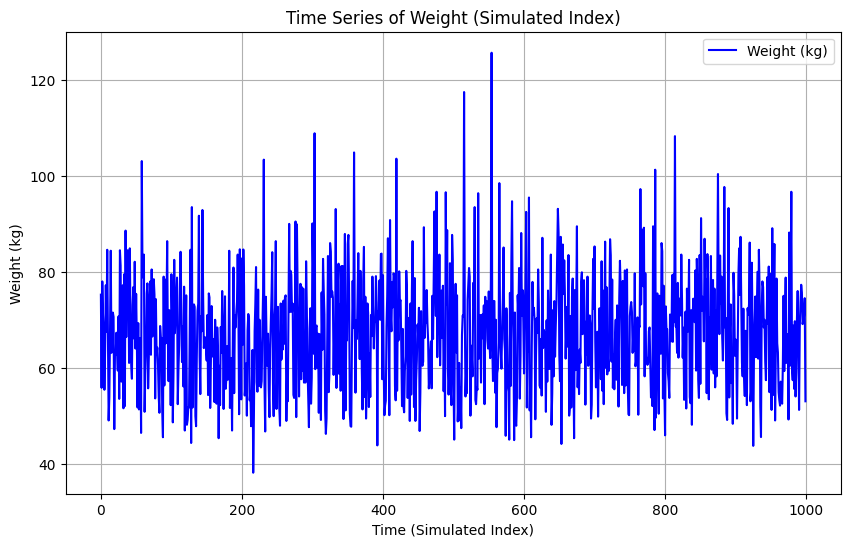

In [ ]:
import matplotlib.pyplot as plt

# Add a time column if not present
if 'time' not in df.columns:
    df['time'] = range(len(df))

plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['weight_kg'], label='Weight (kg)', color='b')

plt.title("Time Series of Weight (Simulated Index)")
plt.xlabel("Time (Simulated Index)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)

plt.show()


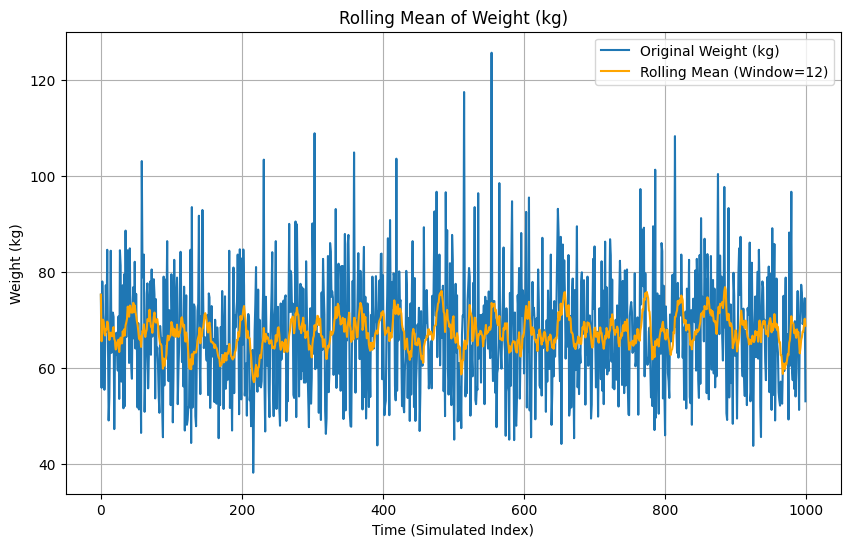

In [ ]:
import matplotlib.pyplot as plt

# Add a time column if not present
if 'time' not in df.columns:
    df['time'] = range(len(df))

# Compute rolling mean for weight_kg
df['rolling_mean_weight'] = df['weight_kg'].rolling(window=12, min_periods=1).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['weight_kg'], label='Original Weight (kg)')
plt.plot(df['time'], df['rolling_mean_weight'], label='Rolling Mean (Window=12)', color='orange', linestyle='-')

plt.title("Rolling Mean of Weight (kg)")
plt.xlabel("Time (Simulated Index)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.show()


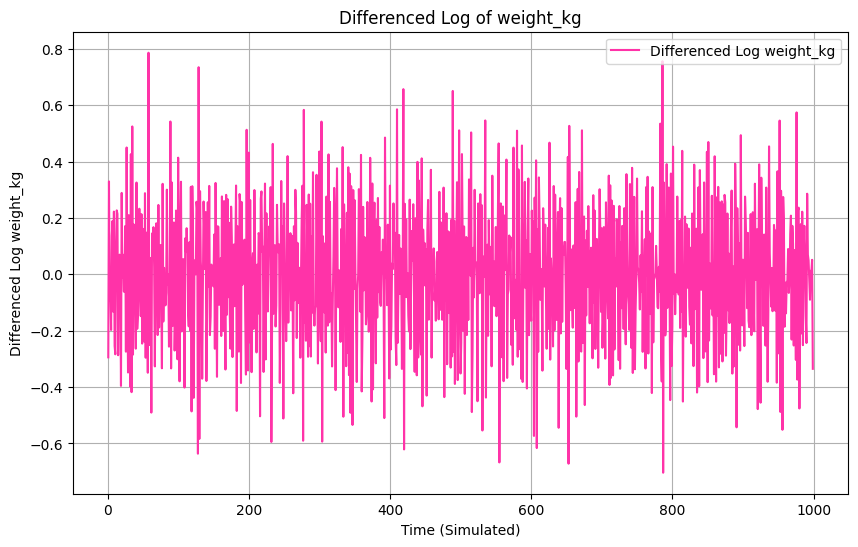

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

col = 'weight_kg'  # change this to any numeric column you want

if col in df.columns:
    # Log transform
    df[f'log_{col}'] = np.log(df[col] + 1)

    # Differencing
    df[f'diff_log_{col}'] = df[f'log_{col}'].diff()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['time'], df[f'diff_log_{col}'], label=f'Differenced Log {col}', color="#FF33A8")
    plt.title(f"Differenced Log of {col}")
    plt.xlabel("Time (Simulated)")
    plt.ylabel(f"Differenced Log {col}")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
else:
    print(f"Column '{col}' not found in the DataFrame.")


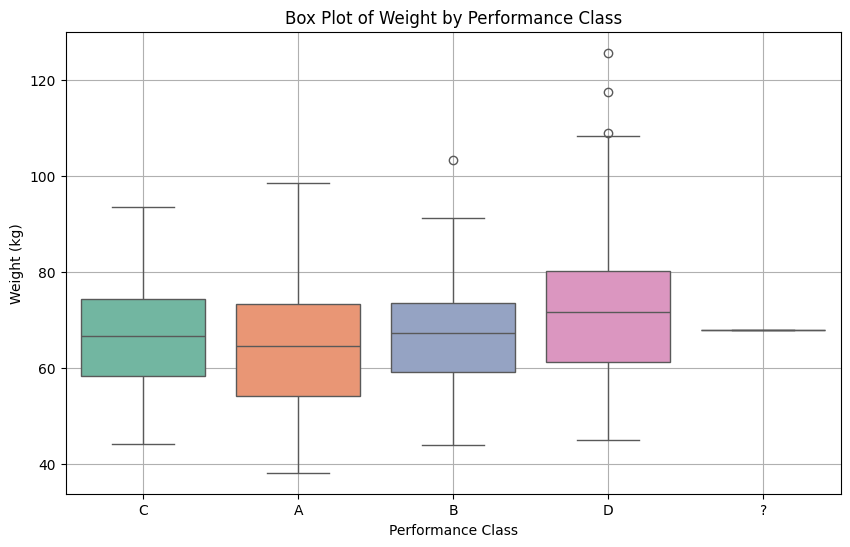

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='weight_kg', data=df, palette="Set2")

plt.title("Box Plot of Weight by Performance Class")
plt.xlabel("Performance Class")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()
